In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

import warnings
warnings.filterwarnings('ignore')


In [2]:
#dataset field names
datacols = ["duration","protocol_type","service","flag","src_bytes","dst_bytes",
            "land","wrong_fragment","urgent","hot","num_failed_logins","logged_in"
            ,"num_comprised","root_shell","su_attempted","num_root",
            "num_file_creations","num_shells","num_access_files",
            "num_outbound_cmds","is_host_login","is_guest_login",
            "count","srv_count","serror_rate","srv_serror_rate",
            "rerror_rate","srv_rerror_rate","same_srv_rate",
            "diff_srv_rate","srv_diff_host_rate","dst_host_count"
            ,"dst_host_srv_count","dst_host_same_srv_rate"
            ,"dst_host_diff_srv_rate","dst_host_same_src_port_rate"
            ,"dst_host_srv_diff_host_rate","dst_host_serror_rate"
            ,"dst_host_srv_serror_rate","dst_host_rerror_rate",
            "dst_host_srv_rerror_rate","attack","last_flag"]

df_train = pd.read_table("KDDTrain+.txt", sep = ",", names=datacols)
df_train = df_train.iloc[:,:-1]

#test dataset
df_test = pd.read_table("KDDTest+.txt", sep = ",", names=datacols)
df_test= df_test.iloc[:,:-1]

In [3]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [5]:
df_train.shape

(125973, 42)

In [6]:
df_test.shape

(22544, 42)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_comprised                125973 non-null  int64  
 13 

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_comprised                22544 non-null  int64  
 13  root_shell      

In [9]:
df_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_comprised                  0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
df_test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_comprised                  0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [11]:
df_train['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [12]:
cat = (df_train.dtypes == 'object')
object_cols = list(cat[cat].index)
object_cols

['protocol_type', 'service', 'flag', 'attack']

In [13]:
df_train['attack'].value_counts()

attack
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [14]:
df_test['attack'].value_counts()

attack
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: count, dtype: int64

In [15]:
mapping = {'normal': 'Normal' , 'neptune':'DoS', 'satan': 'Probe','ipsweep': 'Probe',
           'portsweep':'Probe','smurf':'DoS','nmap':'Probe','back': 'DoS',
           'teardrop': 'DoS', 'warezclient': 'R2L','pod':'DoS','guess_passwd': 'R2L', 
           'buffer_overflow':'U2R','warezmaster':'R2L','land':'DoS','imap':'R2L',
           'rootkit':'U2R','loadmodule':'U2R','ftp_write':'R2L','multihop':'R2L',
           'phf':'R2L','perl':'U2R','spy':'R2L', 'mscan':'Probe','apache2':'DoS',
           'processtable':'DoS','snmpguess':'R2L','saint':'Probe','mailbomb': 'DoS',
           'snmpgetattack':'R2L','httptunnel':'U2R','named':'R2L','ps':'U2R',
           'sendmail':'R2L','xterm':'U2R','xlock':'R2L','xsnoop':'R2L','worm':'R2L',
           'sqlattack':'U2R','udpstorm':'DoS'}

In [16]:
#creating a new column
df_train['attack_class'] = df_train['attack'].apply(lambda x: mapping[x])
df_test['attack_class'] = df_test['attack'].apply(lambda x: mapping[x])

In [17]:
df_train.drop('attack', axis=1, inplace=True)
df_test.drop('attack', axis=1, inplace=True)

In [18]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal


In [19]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,DoS
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,DoS
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,Normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,Probe
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,Probe


In [20]:
df_train['attack_class'].value_counts()

attack_class
Normal    67343
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64

In [21]:
df_test['attack_class'].value_counts()

attack_class
Normal    9711
DoS       7458
R2L       2754
Probe     2421
U2R        200
Name: count, dtype: int64

<Axes: xlabel='attack_class', ylabel='duration'>

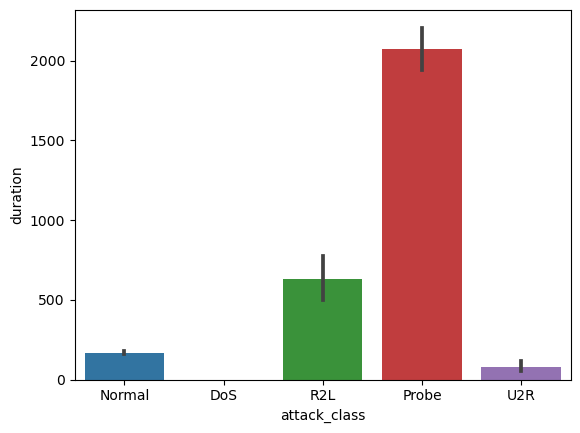

In [22]:
sns.barplot(x='attack_class',y='duration',data=df_train)

<Axes: xlabel='attack_class', ylabel='count'>

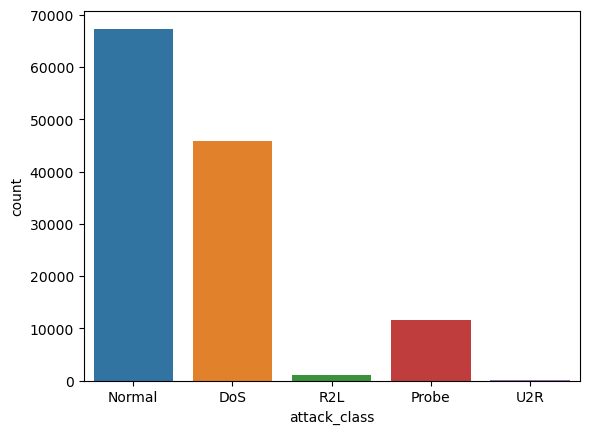

In [23]:
sns.countplot(x='attack_class',data=df_train)

In [24]:
df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_comprised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
df_train['num_outbound_cmds'].describe()

count    125973.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: num_outbound_cmds, dtype: float64

In [26]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [27]:
#Encooding categorical values into numeric values
#First of all seperating categorical values 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_train = df_train_copy.select_dtypes(include = 'object')
cat_test = df_test_copy.select_dtypes(include = 'object')

In [28]:
#now apply label encoder
encoded_train = cat_train.apply(le.fit_transform)
encoded_test = cat_test.apply(le.fit_transform)

In [29]:
#now separating target column from the encoded data
targetcol_train = encoded_train.drop(['attack_class'],axis=1)
targetcol_test = encoded_test.drop(['attack_class'],axis=1)

In [30]:
#This is the targeted column
cat_Ytrain = encoded_train[['attack_class']].copy()
cat_Ytest = encoded_test[['attack_class']].copy()

In [31]:
cat_Ytrain['attack_class'].value_counts()
#Normal =  1
#DoS = 0
#Probe = 2
#R2L = 3
#U2R = 4

attack_class
1    67343
0    45927
2    11656
3      995
4       52
Name: count, dtype: int64

In [32]:
df_train_copy.drop(['protocol_type','service','flag','attack_class'], inplace = True, axis =1)
df_test_copy.drop(['protocol_type','service','flag','attack_class'], inplace = True, axis =1)

In [33]:
df_train_copy_merged = pd.concat([df_train_copy,encoded_train],axis=1)
df_test_copy_merged = pd.concat([df_test_copy,encoded_test],axis=1)

In [34]:
train_x = df_train_copy_merged.drop(['attack_class'],axis =1)
train_y = df_train_copy_merged['attack_class']

In [35]:
#Now performing feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools
rfc= RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe=rfe.fit(train_x,train_y)

feature_map = [(i,v) for i,v in itertools.zip_longest(rfe.get_support(),train_x.columns)]
selected_features = [v for i,v in feature_map if i==True]

selected_features

['src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'protocol_type',
 'flag']

In [36]:
train_x = train_x[selected_features]

In [37]:
#Now performing Standardization on train_x
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()


train_x= scaler.fit_transform(train_x)
test = scaler.fit_transform(df_test_copy_merged)

In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.70,random_state =2)

In [39]:
X_train.shape

(88181, 10)

In [40]:
X_test.shape

(37792, 10)

In [41]:
Y_train.shape

(88181,)

In [42]:
Y_test.shape

(37792,)

In [58]:
#Now training our model
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score,f1_score,confusion_matrix

dt = tree.DecisionTreeClassifier(criterion = 'entropy', splitter= 'best')
svm = SVC(kernel = 'rbf' , C=1.0, gamma = 'scale')
nb = GaussianNB()
clfs = {
    'Decision Tree (J48)' : dt,
    'SVM' : svm,
    'Naive Bayes Classifier' : nb
}

In [44]:
#Function for model fitting and calculating performance metrices
def clf_train_evaluation(clf , X_train, Y_train , X_test, Y_test):
    clf_model=clf.fit(X_train,Y_train)
    score_train = clf.score(X_train,Y_train)

    score_test = clf.score(X_test,Y_test)    
    print(f"Train Score: {score_train}")
    print(f"Test Score: {score_test}")
    pred = clf_model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test,pred)
    cv_score = cross_val_score(clf,X_train,Y_train, cv =5)
    precision = precision_score(Y_test,pred, average = 'micro')
    recall = recall_score(Y_test,pred, average='micro')
    f1 = f1_score(Y_test,pred, average='micro')
    conf_mat = confusion_matrix(Y_test,pred)
 
    print("\nModel Evaluation\n")
    print(f"Accuracy: {accuracy}\n")
    print(f"Cross Validation Score: {cv_score}\n")
    print(f"Precision: {precision}\n")
    print(f"Recall:{recall}\n")
    print(f"F1 score:{f1}\n")
    print(f"Confusion Matrix: {conf_mat}\n")


In [57]:
clf_train_evaluation(dt, X_train, Y_train , X_test, Y_test)

Train Score: 0.9996484503464466
Test Score: 0.996057366638442

Model Evaluation

Accuracy: 0.996057366638442

Cross Validation Score: [0.99580428 0.99654117 0.99608755 0.99665457 0.99523702]

Precision: 0.996057366638442

Recall:0.996057366638442

F1 score:0.996057366638442

Confusion Matrix: [[13755    10     2     0     0]
 [   11 20055    34    23     9]
 [    0    31  3552     0     0]
 [    0    15     0   273     1]
 [    0    13     0     0     8]]



In [46]:
clf_train_evaluation(svm, X_train, Y_train , X_test, Y_test)

Train Score: 0.9703791066102675
Test Score: 0.9683795512277731

Model Evaluation

Accuracy: 0.9683795512277731

Cross Validation Score: [0.97091342 0.97130869 0.96892719 0.96733953 0.96949422]

Precision: 0.9683795512277731

Recall:0.9683795512277731

F1 score:0.9683795512277731

Confusion Matrix: [[13295   425    47     0     0]
 [   32 19942   158     0     0]
 [   13   229  3341     0     0]
 [    0   270     0    19     0]
 [    0    21     0     0     0]]



In [47]:
clf_train_evaluation(nb, X_train, Y_train , X_test, Y_test)

Train Score: 0.4495979859606945
Test Score: 0.45091553767993225

Model Evaluation

Accuracy: 0.45091553767993225

Cross Validation Score: [0.45007654 0.46671581 0.58981628 0.45821048 0.45395781]

Precision: 0.45091553767993225

Recall:0.45091553767993225

F1 score:0.45091553767993225

Confusion Matrix: [[12721   405   246   138   257]
 [ 1399  2563   612  3624 11934]
 [   84   370  1659   119  1351]
 [    6     0     6    84   193]
 [    1     3     0     3    14]]

